# Word Embeddings

A word embedding is a class of approaches for representing words and documents using a
dense vector representation. It is an improvement over more the traditional bag-of-word model
encoding schemes where large sparse vectors were used to represent each word or to score each
word within a vector to represent an entire vocabulary. These representations were sparse
because the vocabularies were vast and a given word or document would be represented by a
large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents
the projection of the word into a continuous vector space. The position of a word within the
vector space is learned from text and is based on the words that surround the word when it is
used. The position of a word in the learned vector space is referred to as its embedding. Two
popular examples of methods of learning word embeddings from text include:
+ Word2Vec.
+ GloVe.
+ FastText, etc.

In addition to these carefully designed methods, a word embedding can be learned as part
of a deep learning model. This can be a slower approach, but tailors the model to a specific
training dataset.

In [3]:
# !pip install gensim

# Word2Vec

**Word2Vec** is a popular word embedding technique developed by Mikolov et al. It converts words into continuous vector representations, capturing their meanings and semantic relationships. Word2Vec uses neural networks to learn these embeddings from a large corpus of text. It comes in two main variants: Skip-gram and Continuous Bag of Words (CBOW).

#### How Word2Vec Works

Word2Vec trains on a large corpus of text and creates embeddings such that words that appear in similar contexts are close to each other in the vector space. The training objective is to predict the context words given a target word or vice versa.

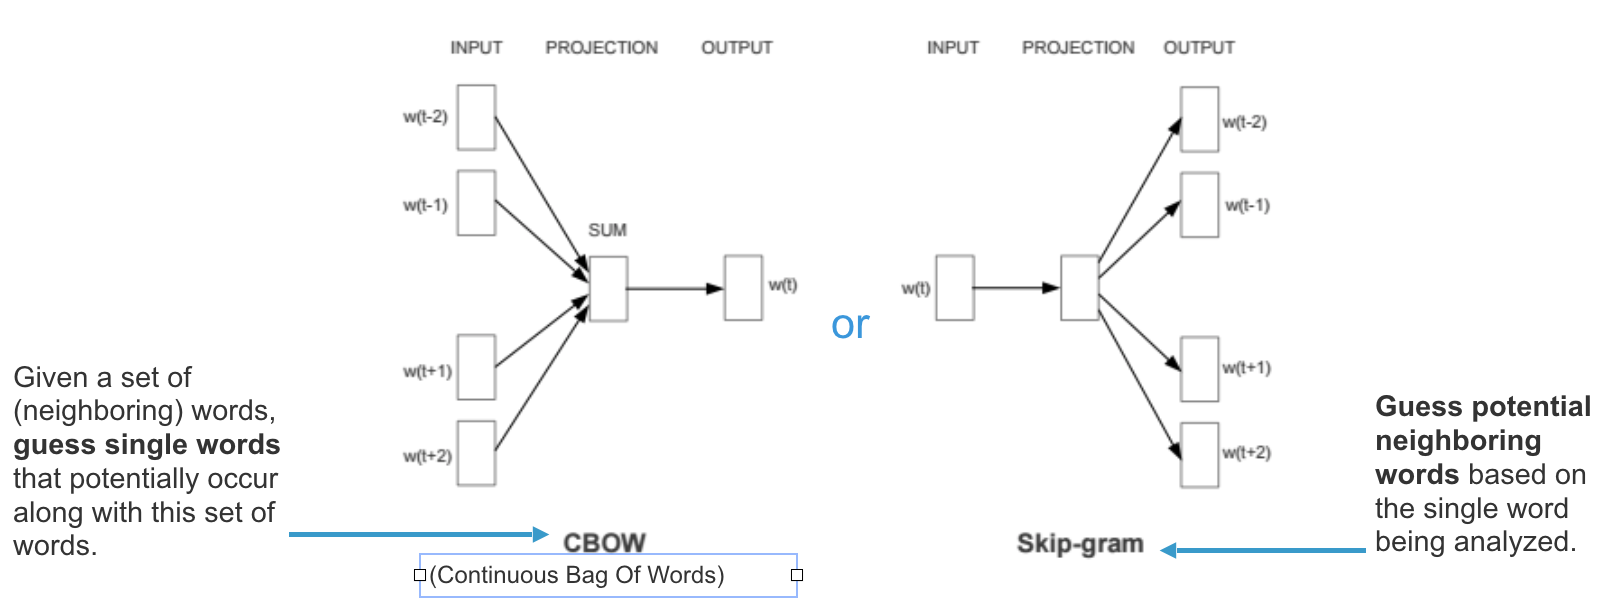

## Skip-gram and CBOW

**1. Skip-gram**

- **Objective**: Predict context words given a target word.
- **Approach**: For each word in the corpus, the model tries to predict the surrounding words (context).
- **Advantages**: Works well with smaller datasets and captures rare words better. It tends to perform well in capturing semantic relationships.

**Example**:
For the sentence "The quick brown fox jumps over the lazy dog," if "quick" is the target word, the model will try to predict "The" and "brown."

- **Context Window**: Determines how many words to consider before and after the target word. For a context window of 2, it predicts two words on each side.

**Skip-gram Model Diagram**:
```
Input (Target Word) -> Neural Network -> Output (Context Words)
```

**2. Continuous Bag of Words (CBOW)**

- **Objective**: Predict the target word given context words.
- **Approach**: For a given set of context words, the model tries to predict the target word.
- **Advantages**: Faster to train and works well with larger datasets. It averages the context, which can be beneficial for frequent words.

**Example**:
For the sentence "The quick brown fox jumps over the lazy dog," if "quick" is the target word, the model will use "The" and "brown" as context to predict "quick."

**CBOW Model Diagram**:
```
Input (Context Words) -> Neural Network -> Output (Target Word)
```

### Differences Between Skip-gram and CBOW

| Feature            | Skip-gram                          | CBOW                           |
|--------------------|------------------------------------|--------------------------------|
| Objective          | Predict context words from a target word | Predict target word from context words |
| Data Suitability   | Works better with smaller datasets and rare words | Works better with larger datasets and frequent words |
| Training Speed     | Slower to train                    | Faster to train                |
| Performance        | Better at capturing semantic relationships | Generally better at capturing syntactic relationships |
| Computational Cost | Higher                             | Lower                          |

### Which Embedding Model to Use and When

- **Skip-gram**:
  - **When to Use**: When you have a smaller dataset or when capturing rare words and fine-grained semantic relationships is important.
  - **Scenarios**: Tasks like analogy detection, semantic similarity tasks, and cases where detailed semantic nuances are crucial.

- **CBOW**:
  - **When to Use**: When you have a large dataset and need faster training. It is beneficial when the focus is on capturing more frequent patterns.
  - **Scenarios**: Large-scale text classification, syntactic tasks, and applications where speed is critical.

In [4]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
        ['this', 'is', 'the', 'second', 'sentence'],
        ['yet', 'another', 'sentence'],
        ['one', 'more', 'sentence', 'love'],
        ['and', 'the', 'final', 'sentence', 'solve']]

C:\Users\Prashant\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [7]:
# train model
cbow_model = Word2Vec(sentences, vector_size = 10, window = 3, min_count=1, sg=0)

### Explanation of the Code

- **sentences**: List of tokenized sentences.
- **Word2Vec**: Initializes and trains the Word2Vec model.
  - `vector_size=10`: Size of the word vectors.
  - `window=3`: Context window size.
  - `min_count=1`: Ignores words with total frequency lower than this.
  - `workers=4`: Number of worker threads to use in training.
  - `sg=1`: Indicates Skip-gram model.
  - `sg=0`: Indicates CBOW model.

In [8]:
# summarize the loaded model
print(cbow_model)

Word2Vec<vocab=16, vector_size=10, alpha=0.025>


In [9]:
list(cbow_model.wv.key_to_index.keys())   # this is the vocab

['sentence',
 'the',
 'is',
 'this',
 'solve',
 'final',
 'and',
 'love',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [10]:
# access word vector for one word
cbow_model.wv.get_vector('love')

array([ 0.05455598,  0.08345091, -0.0145442 , -0.09208831,  0.04371774,
        0.00572208,  0.07440059, -0.00813585, -0.0263755 , -0.08752632],
      dtype=float32)

In [11]:
for key in cbow_model.wv.key_to_index.keys():
    print(key, ':', cbow_model.wv.get_vector(key))

sentence : [-0.00536351  0.00238484  0.05107331  0.09015599 -0.09308276 -0.0711995
  0.06464671  0.08974326 -0.0501915  -0.03765175]
the : [ 0.07379383 -0.01529509 -0.04534442  0.06555367 -0.04861008 -0.0181848
  0.02882639  0.00993654 -0.08292154 -0.0944667 ]
is : [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
this : [-0.07512096 -0.00929068  0.09539422 -0.07316343 -0.02336625 -0.01939589
  0.08080077 -0.0592867   0.00042713 -0.04753667]
solve : [-0.09603605  0.05007694 -0.08758304 -0.04394896 -0.00034404 -0.00295622
 -0.07661133  0.09616364  0.04980589  0.09235525]
final : [-0.08158192  0.04498189 -0.04134833  0.00827747  0.08496136 -0.04464175
  0.04521902 -0.06785722 -0.03552099  0.09398862]
and : [-0.0157806   0.00323172 -0.04137019 -0.0768177  -0.01509309  0.02468751
 -0.00885536  0.05536246 -0.02745937  0.02261946]
love : [ 0.05455598  0.08345091 -0.0145442  -0.09208831  0.04371774  0.00572208
  0.074400

In [12]:
cbow_model.wv.get_vector('analytics')

KeyError: "Key 'analytics' not present"

In [13]:
# save model
cbow_model.save('model.bin')

In [14]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=16, vector_size=10, alpha=0.025>


In [13]:
cbow_model.wv.get_vector('love')

array([ 0.05455598,  0.08345091, -0.0145442 , -0.09208831,  0.04371774,
        0.00572208,  0.07440059, -0.00813585, -0.0263755 , -0.08752632],
      dtype=float32)

In [15]:
sg_model = Word2Vec(sentences, vector_size=10, window = 3, min_count=1, sg=1)

# access vector for one word
sg_model.wv.get_vector('love')

array([ 0.05455508,  0.08348128, -0.01442463, -0.09193361,  0.04362334,
        0.00568476,  0.07447571, -0.00811199, -0.02645334, -0.0874837 ],
      dtype=float32)

In [ ]:
# [ 0.05455598,  0.08345091, -0.0145442 , -0.09208831,  0.04371774,
#         0.00572208,  0.07440059, -0.00813585, -0.0263755 , -0.08752632],

### Some computations using Word Embeddings

In [16]:
from gensim.models import KeyedVectors
# load the google word2vec model
path = r'D:\OneDrive\Google Drive Files\Training\1 MASTER\NLP Master\Word Embedding\WV -1'
filename = path + r'\GoogleNews-vectors-negative300.bin'
# filename = r'C:\Users\dell\Google Drive\DUMP\Desktop\Nomura NLP\Word Embedding\WV -1\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [17]:
model.get_vector('king')

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [18]:
len(model.get_vector('king'))

300

In [19]:
model.get_vector('queen')

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

In [21]:
# What is the woman equivalent of King ????
a = model.get_vector('king') + model.get_vector('woman') - model.get_vector('man')
a  # resultant word vector

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

In [20]:
model.cosine_similarities(a, [model.get_vector('queen')])

array([0.7300517], dtype=float32)

In [22]:
# calculate: (king - man) + woman = ?  (Queen)
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print(result)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]


In [2]:
# Who is the God of Cricket in India ?


In [24]:
# what is the female equivalent of the word "man"
result = model.most_similar(positive=['man', 'female'], negative=['male'], topn=3)
print(result)

[('woman', 0.7685461640357971), ('teenage_girl', 0.5872832536697388), ('lady', 0.5742953419685364)]


In [25]:
#Checking how similarity works. 
print (model.similarity('strawberry', 'mango'))

0.63029367


In [26]:
print(model.similarity('novel', 'book'))

0.6121936


In [27]:
print(model.similarity('novel', 'mango'))

0.06800091


In [24]:
# Finding the odd one out.
# model.doesnt_match('breakfast cereal dinner lunch'.split())
model.doesnt_match('mango apple banana rose'.split())

'rose'

In [25]:
# What is the newborn of a dog called?
result = model.most_similar(positive=['dog', 'newborn'], topn=3)
print(result)

[('puppy', 0.793572187423706), ('pup', 0.7656401991844177), ('kitten', 0.7306694388389587)]


## Using Stanford’s GloVe Embedding

Stanford researchers also have their own word embedding algorithm like Word2Vec called `Global
Vectors` for Word Representation, or `GloVe` for short. 

### Explanation of How GloVe Model Trains Embeddings

GloVe (Global Vectors for Word Representation) is a word embedding technique developed by researchers at Stanford. Unlike Word2Vec, which uses local context windows to generate embeddings, GloVe leverages the global statistical information of a corpus to create embeddings. Here’s a detailed explanation of how the GloVe model trains embeddings:

#### Core Idea

The core idea behind GloVe is to use the global word-word co-occurrence matrix to capture the statistical information and relationships between words. This co-occurrence matrix records how frequently pairs of words co-occur within a specific context window across the entire corpus.

### Steps in building GloVe model

The GloVe model trains embeddings by:
1. Constructing a co-occurrence matrix from the entire corpus.
2. Calculating the co-occurrence probabilities.
3. Defining a cost function to minimize the difference between the dot product of word vectors and the logarithm of their co-occurrence probabilities.
4. Using optimization techniques to iteratively adjust the word vectors and biases to minimize the cost function.

By leveraging global statistical information, GloVe captures both syntactic and semantic relationships between words, resulting in high-quality word embeddings.


## Building the Co-occurrence Matrix

Consider the following small corpus:
1. "The quick brown fox"
2. "The quick fox"
3. "The brown dog"

We'll use a context window size of 1, meaning we only look at the immediate neighbors of each word.

#### Step-by-Step Process

1. **Tokenize the Sentences**:
   - Sentence 1: ["the", "quick", "brown", "fox"]
   - Sentence 2: ["the", "quick", "fox"]
   - Sentence 3: ["the", "brown", "dog"]

2. **Initialize the Co-occurrence Matrix**:
   Create an empty matrix for the unique words in the corpus.

3. **Populate the Matrix**:
   Count the co-occurrences of each word with its immediate neighbors.

### Example Co-occurrence Matrix

|      | the | quick | brown | fox | dog |
|------|-----|-------|-------|-----|-----|
| the  | 0   | 3     | 1    | 0   | 1   |
| quick| 3   | 0     | 1     | 2   | 0   |
| brown| 2   | 1     | 0     | 1   | 1   |
| fox  | 0   | 2     | 1     | 0   | 0   |
| dog  | 1   | 0     | 1     | 0   | 0   |

### Explanation

- "the" appears 3 times next to "quick".
- "the" appears 1 times next to "brown".
- "the" appears 1 time next to "dog".
- "quick" appears 1 time next to "brown".
- "quick" appears 2 times next to "fox".
- "brown" appears 1 time next to "fox".
- "brown" appears 1 time next to "dog".
- "fox" appears 0 times next to "the", "dog".

This co-occurrence matrix represents how often each word appears in the context of every other word within the given window size. The GloVe model uses this co-occurrence matrix to learn word embeddings that capture the statistical relationships between words in the corpus.


You can download the GloVe pre-trained word vectors and load them easily with `Gensim`. The first step is to convert the GloVe file format to the Word2Vec file format. The only difference is the addition of a small header line. This can be done by calling the `glove2word2vec()` function.  Once converted, the file can be loaded just like Word2Vec file above. 

You can download the smallest GloVe pre-trained model from the GloVe
website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional
vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary. The
direct download link is here http://nlp.stanford.edu/data/glove.6B.zip

In [26]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert glove to word2vec format
path = r'D:\OneDrive\Google Drive Files\Training\1 MASTER\NLP new\Word Embeddings'

glove_input_file = path + '\glove.6B.100d.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Prashant\AppData\Local\Temp\ipykernel_19868\925924199.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [27]:
# load the converted model
filename = 'word2vec.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

You now have a copy of the `GloVe` model in `Word2Vec` format with the filename
`glove.6B.100d.txt.word2vec`. Now we can load it and perform the same `(king - man) + woman = ?` test as in the previous section.

In [28]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


### Further Reading:

#### Word Embeddings
+ Word Embedding on Wikipedia.https://en.wikipedia.org/wiki/Word2vec
+ Word2Vec on Wikipedia. https://en.wikipedia.org/wiki/Word2vec
+ Google Word2Vec project. https://code.google.com/archive/p/word2vec/
+ Stanford GloVe project. https://nlp.stanford.edu/projects/glove/

### Articles
+ Messing Around With Word2Vec, 2016. https://quomodocumque.wordpress.com/2016/01/15/messing-around-with-word2vec/
+ Vector Space Models for the Digital Humanities, 2015. http://bookworm.benschmidt.org/posts/2015-10-25-Word-Embeddings.html
+ Gensim Word2Vec Tutorial, 2014. https://rare-technologies.com/word2vec-tutorial/

# Facebook's FastText

`fastText` is the improvised version of `word2vec`. `word2vec` basically considers words to build the representation. But `fastText` takes each character while computing the representation of the word.

In [29]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [30]:
from gensim.models import FastText
fast = FastText(sentences,vector_size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

In [31]:
fast.wv.get_vector('future')

array([ 0.00718044,  0.00634451,  0.01015092,  0.00278108,  0.00071975,
        0.01481973, -0.01144717,  0.0085934 ,  0.00387139, -0.00861204,
       -0.01795045, -0.00222266,  0.0043997 ,  0.01099374,  0.00549521,
       -0.02154304,  0.02005067, -0.00923354,  0.00634542,  0.00346849],
      dtype=float32)

In [32]:
fast.wv.get_vector('zebra')

array([ 0.00147712, -0.00446224,  0.00263172,  0.01258437,  0.00300411,
       -0.00155868,  0.01081216,  0.00862841,  0.00183617, -0.0088448 ,
        0.00966382,  0.01666071,  0.00169474,  0.00517762, -0.0043534 ,
        0.00705098,  0.01564226, -0.01321043,  0.00245605, -0.00059505],
      dtype=float32)

In [33]:
fast.wv.key_to_index

{'nlp': 0,
 'I': 1,
 'future': 2,
 'love': 3,
 'will': 4,
 'learn': 5,
 'in': 6,
 '2': 7,
 'months': 8,
 'is': 9,
 'learning': 10,
 'machine': 11,
 'time': 12,
 'and': 13,
 'solves': 14,
 'lot': 15,
 'of': 16,
 'industry': 17,
 'problems': 18,
 'uses': 19,
 'saves': 20}

In [34]:
len(fast.wv.key_to_index)

21